    Beginning the Regression Preparation

In [1]:

import pandas as pd

Building a Random Forest Model taking in Drug Claim Counts

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
%matplotlib inline

In [3]:
ML_dataset = pd.read_csv("data\ML_dataset_2.csv")

In [4]:
ML_dataset.head()

,specialty_description,nppes_provider_city,brand_percent_spending,total_claim_count,total_drug_cost,specialty_index,city_index
0,General Practice,DANBURY,0.000419,14581,179296.96,76,8715
1,Pediatric Medicine,POCATELLO,0.000740,756,32378.99,123,7095
2,Dentist,SARASOTA,0.000862,17995,160293.87,1,9152
3,Dentist,COLORADO SPRINGS,0.001175,16281,169991.44,1,8393
4,Dentist,SALT LAKE CITY,0.001284,15315,139204.71,1,9135


Begin Model Building and Fitting

Input and Output

In [5]:
Labels = ML_dataset.columns[3:].tolist() #columns of drugs
print(Labels)

['total_claim_count', 'total_drug_cost', 'specialty_index', 'city_index']


In [6]:
X = ML_dataset[ML_dataset.columns[3:].tolist()].values
y = ML_dataset["brand_percent_spending"].values
print(X)
print(len(X))
print(len(y))
print(y)

[[1.4581000e+04 1.7929696e+05 7.6000000e+01 8.7150000e+03]
 [7.5600000e+02 3.2378990e+04 1.2300000e+02 7.0950000e+03]
 [1.7995000e+04 1.6029387e+05 1.0000000e+00 9.1520000e+03]
 ...
 [1.8800000e+02 3.2955069e+05 1.3400000e+02 9.2480000e+03]
 [2.0190000e+03 1.4174070e+06 1.2300000e+02 8.7820000e+03]
 [3.5000000e+01 8.8662635e+05 1.4700000e+02 8.3690000e+03]]
87243
87243
[4.19008607e-04 7.39516841e-04 8.62068098e-04 ... 9.99402208e-01
 9.99430660e-01 9.99752962e-01]


PCA Feature Selection

In [7]:
PCA = PCA(n_components = 'mle')
PCA.fit_transform(X)


array([[-1.56544925e+06, -1.23606381e+04, -2.18792876e+03],
       [-1.71249042e+06,  7.61987997e+01, -4.95853894e+02],
       [-1.58441948e+06, -1.59497730e+04, -2.64858728e+03],
       ...,
       [-1.41533700e+06,  3.44310952e+03, -2.61369522e+03],
       [-3.27511340e+05,  1.18053683e+04, -2.04395838e+03],
       [-8.58287288e+05,  8.81180363e+03, -1.67466886e+03]])

In [8]:
print(PCA.explained_variance_)  

[4.78841245e+13 1.14309180e+09 6.05749681e+06]


Splitting Data into Test and Train

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train

Fit Data into Random Forest Model

In [10]:
#fit data into random forest regression
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Feature Importances

In [11]:
print(regressor.feature_importances_)

[0.19499064 0.21837807 0.46323419 0.1233971 ]


In [12]:
coeff_df = pd.DataFrame( regressor.feature_importances_, Labels, columns=['Importances'])  
coeff_df = coeff_df[coeff_df["Importances"] != 0]
coeff_df.sort_values("Importances" ,ascending = False)

,Importances
specialty_index,0.463234
total_drug_cost,0.218378
total_claim_count,0.194991
city_index,0.123397


Predictions

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25)


,Actual,Predicted
0,0.647142,0.695798
1,0.970425,0.820337
2,0.397520,0.470301
3,0.753875,0.688145
4,0.966279,0.961918
5,0.887940,0.924740
6,0.630310,0.725094
7,0.735403,0.632622
8,0.443592,0.418361
9,0.579946,0.559259


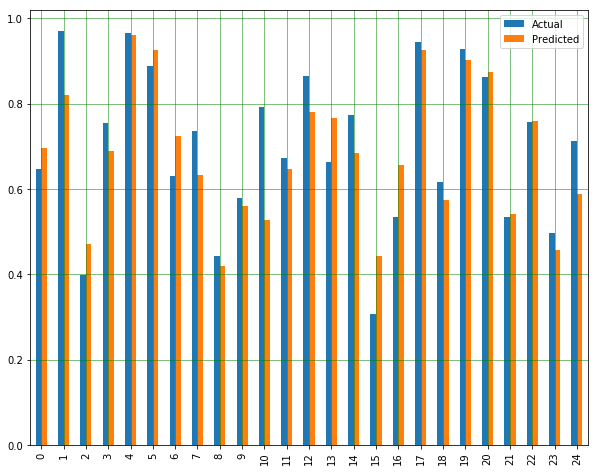

In [15]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0, 0.5, 'Predicted')

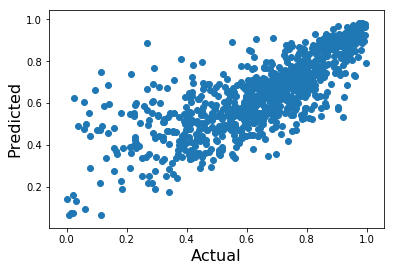

In [16]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"])
plt.xlabel("Actual", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted",  fontsize = 16)

Statistics

In [17]:
print("r Squared:", metrics.r2_score(y_test, y_pred))

r Squared: 0.5938337293251992


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.09281248011704951
Mean Squared Error: 0.018588292390369014


Save the Trained Model

In [19]:
from sklearn.externals.joblib import dump,load

In [20]:
dump(regressor, "RFR.joblib") 

['RFR.joblib']